# Analisis Hubungan Faktor Iklim dan Tanah terhadap Nilai Numerik Komoditas Tanaman Menggunakan Regresi Linier

## Persiapan Data
Instalasi library yang diperlukan


In [20]:
!pip install kaggle
!pip install seaborn

In [23]:
import json
import os
from pathlib import Path

# your api key
api_key = {"username":"adamrahmatilahil","key":"d06fa39366c4c45a3566205c2a72b725"}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)

## Unduh Dataset dari Kaggle
Pastikan sudah memiliki token API Kaggle

In [26]:
import os
import pandas as pd

# Cek apakah dataset sudah ada
dataset_path = "Crop_recommendation.csv"
if not os.path.exists(dataset_path):
    try:
        from kaggle.api.kaggle_api_extended import KaggleApi
        api = KaggleApi()
        api.authenticate()
        api.dataset_download_files(
            'atharvaingle/crop-recommendation-dataset',
            path='.',
            unzip=True
        )
        print("✅ Dataset berhasil di-download!")
    except Exception as e:
        print(f"❌ Error: {e}")
        print("Pastikan Anda sudah:")
        print("1. Menginstal kaggle API (pip install kaggle)")
        print("2. Menyimpan token kaggle.json di ~/.kaggle/")
        print("3. Memberikan izin: chmod 600 ~/.kaggle/kaggle.json")
else:
    print("✅ Dataset sudah tersedia lokal")

✅ Dataset sudah tersedia lokal


# Menampilkan 5 baris pertama dataset

In [28]:

# Load dataset
df = pd.read_csv("Crop_recommendation.csv")
print("🖥️ 5 Baris pertama dataset:")
display(df.head())

#
print("\n📊 Informasi dataset:")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\n🔍 Kolom yang tersedia:")
print(df.columns.tolist())

🖥️ 5 Baris pertama dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



📊 Informasi dataset:
Jumlah baris: 2200
Jumlah kolom: 8

🔍 Kolom yang tersedia:
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']


## Seleksi Fitur Relevan
Memilih kolom yang relevan untuk analisis

In [30]:
# Kolom yang dipilih
selected_columns = ['N', 'P', 'K', 'rainfall', 'label']
df_selected = df[selected_columns].copy()

print("\n📌 Kolom yang dipilih:")
print(selected_columns)

# %%
print("\n📈 Statistik deskriptif:")
display(df_selected.describe())

# %%
print("\n🌱 Jumlah unik tanaman:")
print(df_selected['label'].value_counts())


📌 Kolom yang dipilih:
['N', 'P', 'K', 'rainfall', 'label']

📈 Statistik deskriptif:


,N,P,K,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,103.463655
std,36.917334,32.985883,50.647931,54.958389
min,0.000000,5.000000,5.000000,20.211267
25%,21.000000,28.000000,20.000000,64.551686
50%,37.000000,51.000000,32.000000,94.867624
75%,84.250000,68.000000,49.000000,124.267508
max,140.000000,145.000000,205.000000,298.560117



🌱 Jumlah unik tanaman:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


## Visualisasi Hubungan Antar Variabel
Gunakan pairplot untuk melihat hubungan

⏳ Membuat pairplot (mungkin butuh beberapa saat)...


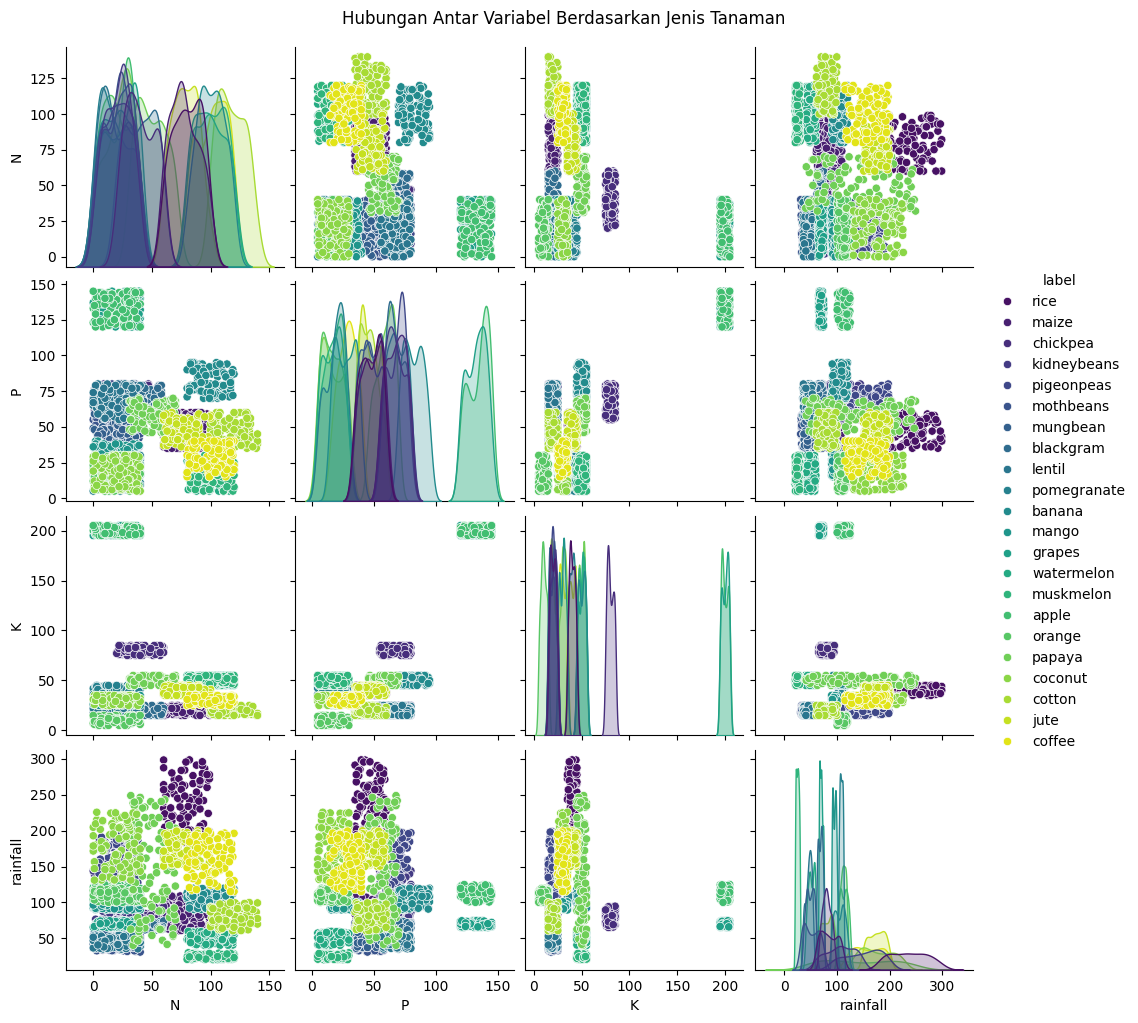

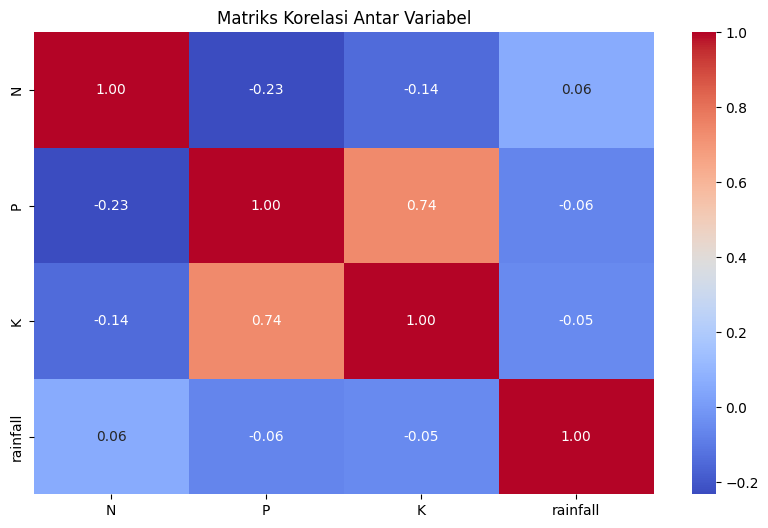

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

### Pairplot untuk Variabel Numerik
print("⏳ Membuat pairplot (mungkin butuh beberapa saat)...")
sns.pairplot(df_selected, hue='label', palette='viridis', height=2.5)
plt.suptitle('Hubungan Antar Variabel Berdasarkan Jenis Tanaman', y=1.02)
plt.show()

### Heatmap Korelasi
plt.figure(figsize=(10, 6))
corr_matrix = df_selected.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

## Persiapan Data untuk Modeling
Encoding label dan splitting dataset

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode label tanaman
le = LabelEncoder()
df_selected['label_encoded'] = le.fit_transform(df_selected['label'])

# Pisahkan fitur dan target
X = df_selected[['rainfall']]  # Gunakan curah hujan sebagai fitur
y = df_selected['label_encoded']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # Gunakan random state untuk reproduktibilitas
)

print(f"Total set: {df.shape[0]} sample")
print("\n✂️ Pembagian dataset:")
print(f"Training set: {X_train.shape[0]} sampel")
print(f"Test set: {X_test.shape[0]} sampel")

Total set: 2200 sample

✂️ Pembagian dataset:
Training set: 1760 sampel
Test set: 440 sampel


## Studi Kasus: Pengaruh Curah Hujan terhadap Jenis Tanaman
Gunakan regresi linier sederhana

In [35]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Training model
model.fit(X_train, y_train)

# Tampilkan parameter model
print(f"🔢 Parameter model:")
print(f"Koefisien (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

🔢 Parameter model:
Koefisien (slope): 0.0057
Intercept: 9.9584


## Evaluasi Model
# Hitung error dan visualisasi hasil

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prediksi pada data test
y_pred = model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📏 Hasil Evaluasi:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


📏 Hasil Evaluasi:
Mean Squared Error (MSE): 42.35
R² Score: -0.00


### Visualisasi Hasil Regresi


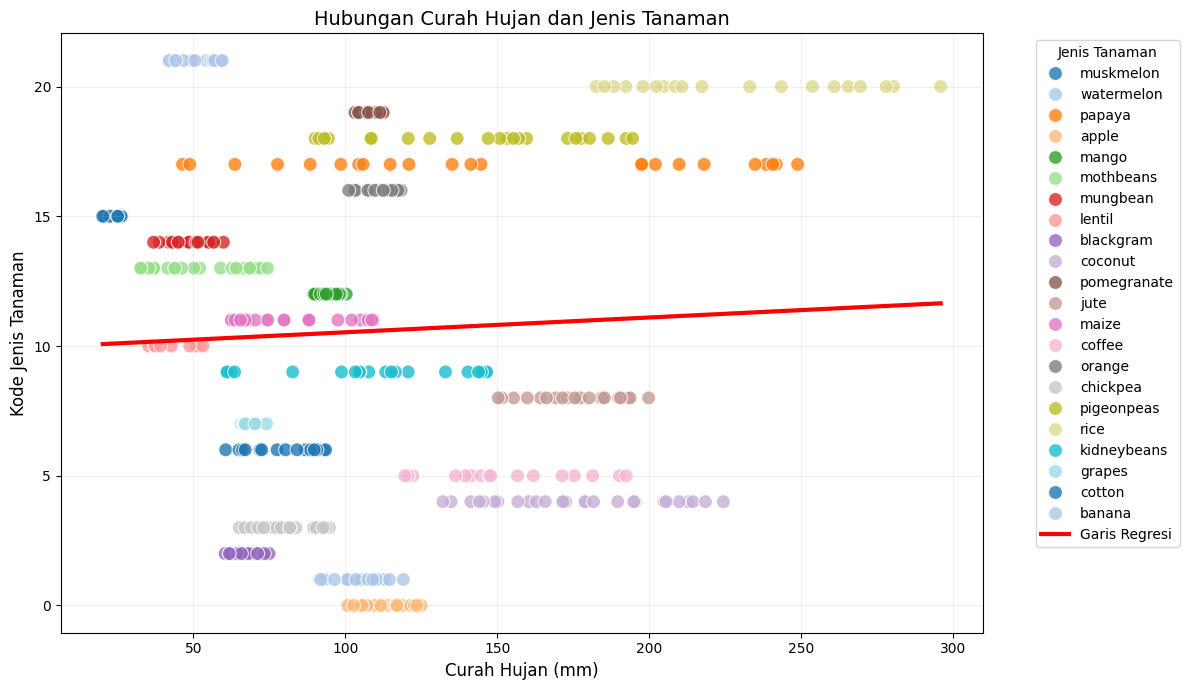


💡 Interpretasi:
- MSE yang tinggi menunjukkan model tidak cocok untuk masalah klasifikasi
- R² rendah menunjukkan hubungan non-linier antara curah hujan dan jenis tanaman
- Disarankan menggunakan model klasifikasi (Random Forest, XGBoost) untuk hasil lebih akurat


In [37]:
plt.figure(figsize=(12, 7))

# Plot data asli
sns.scatterplot(
    x=X_test['rainfall'],
    y=y_test,
    hue=le.inverse_transform(y_test),
    palette='tab20',
    s=100,
    alpha=0.8
)

# Plot garis regresi
sorted_idx = np.argsort(X_test.values.ravel())
plt.plot(
    X_test.values[sorted_idx],
    y_pred[sorted_idx],
    color='red',
    linewidth=3,
    label='Garis Regresi'
)

plt.xlabel('Curah Hujan (mm)', fontsize=12)
plt.ylabel('Kode Jenis Tanaman', fontsize=12)
plt.title('Hubungan Curah Hujan dan Jenis Tanaman', fontsize=14)
plt.legend(title='Jenis Tanaman', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

### Interpretasi Hasil
print("\n💡 Interpretasi:")
print("- MSE yang tinggi menunjukkan model tidak cocok untuk masalah klasifikasi")
print("- R² rendah menunjukkan hubungan non-linier antara curah hujan dan jenis tanaman")
print("- Disarankan menggunakan model klasifikasi (Random Forest, XGBoost) untuk hasil lebih akurat")